## Homework 3 MAE-207

## Connect to ODrive

In [1]:
import time
from IPython.display import clear_output
import numpy as np
import matplotlib as mpl

# import sympy
from sympy import symbols, pprint
from sympy import sin, cos, asin, acos, atan, pi, sqrt
from sympy import Matrix
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sympy import lambdify
# import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

from IPython import display # for the animation
# import matplotlib as mpl
# mpl.use('Qt5Agg')
# plt.ion()
import os
import matplotlib.pyplot as plt
# plt.ion()

# for the symbolic manipulation of jacobian
import sympy as sp
# from sympy import symbols
#from sympy import sin, cos, asin, acos, pi, atan2, sqrt
from sympy.utilities.lambdify import lambdify
#from sympy import Matrix

from scipy.optimize import minimize
from scipy.optimize import fsolve

import time

import odrive
from odrive.utils import *
import odrive.enums
%matplotlib qt

In [2]:
odrv0 = odrive.find_any()
if odrv0 is not None:
    print('Connected!')
    print('Odrive serial {}'.format(odrv0.serial_number))
    
    m0 = odrv0.axis0.motor.is_calibrated
    m1 = odrv0.axis1.motor.is_calibrated
    
    print('Motor 0 calibrated: {}'.format(m0))
    print('Motor 1 calibrated: {}'.format(m1))    
    
else:
    print('Not connected')
    

Connected!
Odrive serial 35760845828174
Motor 0 calibrated: False
Motor 1 calibrated: False


In [3]:
odrv0.serial_number

35760845828174

## Homework 3 MAE-207

## Connect to ODrive

In [2]:
odrv0 = odrive.find_any()

In [3]:
print('Odrive serial {}'.format(odrv0.serial_number))

Odrive serial 35760845828174


### JJ_Odrv0=20863883304E
### SS_Odrv0=306139573235

In [ ]:
# odrv0 = odrive.find_any()
# if odrv0 is not None:
#     print('Connected!')
#     print('Odrive serial {}'.format(odrv0.serial_number))
    
#     m0 = odrv0.axis0.motor.is_calibrated
#     m1 = odrv0.axis1.motor.is_calibrated
    
#     print('Motor 0 calibrated: {}'.format(m0))
#     print('Motor 1 calibrated: {}'.format(m1))    
    
# else:
#     print('Not connected')
    

In [18]:
def connect_odrive(serial):
    odrv0 = odrive.find_any(serial_number = serial, timeout = 20)
    if odrv0 is not None:
        print('Connected!')
        print('Target serial {} \t Odrive serial {}'.format(serial, odrv0.serial_number))
        
        m0 = odrv0.axis0.motor.is_calibrated
        m1 = odrv0.axis1.motor.is_calibrated

        print('Motor 0 calibrated: {}'.format(m0))
        print('Motor 1 calibrated: {}'.format(m1))    
    else:
        print("ODrive ({}) not found".format(serial))
    return odrv0
    
JJ_odrv0 = connect_odrive('20863883304E')
SS_odrv0 = connect_odrive('306139573235')


Connected!
Target serial 20863883304E 	 Odrive serial 35760845828174
Motor 0 calibrated: True
Motor 1 calibrated: True
Connected!
Target serial 306139573235 	 Odrive serial 53194131976757
Motor 0 calibrated: True
Motor 1 calibrated: True


#### Calibrating the Motors

In [17]:
SS_odrv0.axis0.requested_state = odrive.enums.AXIS_STATE_FULL_CALIBRATION_SEQUENCE
SS_odrv0.axis1.requested_state = odrive.enums.AXIS_STATE_FULL_CALIBRATION_SEQUENCE

JJ_odrv0.axis0.requested_state = odrive.enums.AXIS_STATE_FULL_CALIBRATION_SEQUENCE
JJ_odrv0.axis1.requested_state = odrive.enums.AXIS_STATE_FULL_CALIBRATION_SEQUENCE

time.sleep(15)

print('\t Motor 0 calibration result: {} \r\n'.format(SS_odrv0.axis0.motor.is_calibrated), 
      '\t Motor 1 calibration result: {}'.format(SS_odrv0.axis1.motor.is_calibrated))
print('\t Motor 0 calibration result: {} \r\n'.format(JJ_odrv0.axis0.motor.is_calibrated), 
      '\t Motor 1 calibration result: {}'.format(JJ_odrv0.axis1.motor.is_calibrated))

SS_odrv0.axis0.motor.config.pre_calibrated = True
SS_odrv0.axis1.motor.config.pre_calibrated = True

JJ_odrv0.axis0.motor.config.pre_calibrated = True
JJ_odrv0.axis1.motor.config.pre_calibrated = True

SS_odrv0.save_configuration()
JJ_odrv0.save_configuration()


	 Motor 0 calibration result: True 
 	 Motor 1 calibration result: True
	 Motor 0 calibration result: True 
 	 Motor 1 calibration result: True


In [54]:
SS_odrv0.axis0.requested_state = odrive.enums.AXIS_STATE_CLOSED_LOOP_CONTROL
SS_odrv0.axis1.requested_state = odrive.enums.AXIS_STATE_CLOSED_LOOP_CONTROL

SS_odrv0.axis0.controller.set_pos_setpoint(0,0,0)
SS_odrv0.axis1.controller.set_pos_setpoint(0,0,0)

In [22]:
# Function to setup home position
def autohome(odrv0):
    print('Bring motors to home and press ENTER')
    input("<enter>")
    R_pos1=odrv0.axis0.encoder.pos_estimate
    L_pos1=odrv0.axis1.encoder.pos_estimate
    print('Bring motors to 90-90 and press ENTER')
    input("<enter>")
    R_pos2=odrv0.axis0.encoder.pos_estimate
    L_pos2=odrv0.axis1.encoder.pos_estimate
    ML_para=(90/(L_pos2-L_pos1))
    MR_para=((-90)/(R_pos2-R_pos1))
    print(ML_para)
    print(MR_para)
    print(L_pos2, L_pos1, R_pos2, R_pos1)
    print("Done")
    return ML_para,MR_para,L_pos1,R_pos1

In [23]:
autohome(JJ_odrv0)

Bring motors to home and press ENTER


<enter> 


Bring motors to 90-90 and press ENTER


<enter> 


-0.04314477468839885
-0.045454545454545456
4756.75 6842.75 -3680.25 -5660.25
Done


(-0.04314477468839885, -0.045454545454545456, 6842.75, -5660.25)

In [25]:
def idle_all():
    JJ_odrv0.axis0.requested_state = odrive.enums.AXIS_STATE_IDLE
    JJ_odrv0.axis1.requested_state = odrive.enums.AXIS_STATE_IDLE
    SS_odrv0.axis0.requested_state = odrive.enums.AXIS_STATE_IDLE
    SS_odrv0.axis1.requested_state = odrive.enums.AXIS_STATE_IDLE
    

In [24]:
# Function to make the motors return to idle mode 
def motor_idle(odrv0): 
    odrv0.axis0.requested_state = odrive.enums.AXIS_STATE_IDLE
    odrv0.axis1.requested_state = odrive.enums.AXIS_STATE_IDLE

In [26]:
# Defining the Symbols
(theta_l, 
 theta_r,
 l1, 
 l2,
 w) = symbols(""" theta_l
                         theta_r
                         l1 
                         l2
                         w """ , real = True)

#### Forward Kinematics definition

In [27]:
A = 2*l2*l1*sin(theta_l)- 2*l1*l2*sin(theta_r)
B = 2*l2*w - 2*l1*l2*cos(theta_r) + 2*l2*l1*cos(theta_l)
C = 2*(l1**2) + w**2 - 2*l1*l1*sin(theta_l)*sin(theta_r) - 2*l1*w*cos(theta_r) + 2*l1*w*cos(theta_l) - 2*l1*l1*cos(theta_l)*cos(theta_r)

theta3_1 = 2*atan((A + sqrt(A**2 + B**2 - C**2))/(B-C))
theta3_2 = 2*atan((A - sqrt(A**2 + B**2 - C**2))/(B-C))

xc_1 = l1*cos(theta_l) + l2*cos(theta3_1) + w/2
xc_1
xc_2 = l1*cos(theta_l) + l2*cos(theta3_2) + w/2
xc_2

yc_1 = l1*sin(theta_l) + l2*sin(theta3_1)
yc_1
yc_2 = l1*sin(theta_l) + l2*sin(theta3_2)
yc_2
#sympy.simplify(theta3_1)
#sympy.simplify(theta3_2)

l1*cos(theta_l) + l2*cos(2*atan((2*l1*l2*sin(theta_l) - 2*l1*l2*sin(theta_r) + sqrt((2*l1*l2*sin(theta_l) - 2*l1*l2*sin(theta_r))**2 + (2*l1*l2*cos(theta_l) - 2*l1*l2*cos(theta_r) + 2*l2*w)**2 - (-2*l1**2*sin(theta_l)*sin(theta_r) - 2*l1**2*cos(theta_l)*cos(theta_r) + 2*l1**2 + 2*l1*w*cos(theta_l) - 2*l1*w*cos(theta_r) + w**2)**2))/(2*l1**2*sin(theta_l)*sin(theta_r) + 2*l1**2*cos(theta_l)*cos(theta_r) - 2*l1**2 + 2*l1*l2*cos(theta_l) - 2*l1*l2*cos(theta_r) - 2*l1*w*cos(theta_l) + 2*l1*w*cos(theta_r) + 2*l2*w - w**2))) + w/2

l1*cos(theta_l) + l2*cos(2*atan((2*l1*l2*sin(theta_l) - 2*l1*l2*sin(theta_r) - sqrt((2*l1*l2*sin(theta_l) - 2*l1*l2*sin(theta_r))**2 + (2*l1*l2*cos(theta_l) - 2*l1*l2*cos(theta_r) + 2*l2*w)**2 - (-2*l1**2*sin(theta_l)*sin(theta_r) - 2*l1**2*cos(theta_l)*cos(theta_r) + 2*l1**2 + 2*l1*w*cos(theta_l) - 2*l1*w*cos(theta_r) + w**2)**2))/(2*l1**2*sin(theta_l)*sin(theta_r) + 2*l1**2*cos(theta_l)*cos(theta_r) - 2*l1**2 + 2*l1*l2*cos(theta_l) - 2*l1*l2*cos(theta_r) - 2*l1*w*cos(theta_l) + 2*l1*w*cos(theta_r) + 2*l2*w - w**2))) + w/2

l1*sin(theta_l) + l2*sin(2*atan((2*l1*l2*sin(theta_l) - 2*l1*l2*sin(theta_r) + sqrt((2*l1*l2*sin(theta_l) - 2*l1*l2*sin(theta_r))**2 + (2*l1*l2*cos(theta_l) - 2*l1*l2*cos(theta_r) + 2*l2*w)**2 - (-2*l1**2*sin(theta_l)*sin(theta_r) - 2*l1**2*cos(theta_l)*cos(theta_r) + 2*l1**2 + 2*l1*w*cos(theta_l) - 2*l1*w*cos(theta_r) + w**2)**2))/(2*l1**2*sin(theta_l)*sin(theta_r) + 2*l1**2*cos(theta_l)*cos(theta_r) - 2*l1**2 + 2*l1*l2*cos(theta_l) - 2*l1*l2*cos(theta_r) - 2*l1*w*cos(theta_l) + 2*l1*w*cos(theta_r) + 2*l2*w - w**2)))

l1*sin(theta_l) + l2*sin(2*atan((2*l1*l2*sin(theta_l) - 2*l1*l2*sin(theta_r) - sqrt((2*l1*l2*sin(theta_l) - 2*l1*l2*sin(theta_r))**2 + (2*l1*l2*cos(theta_l) - 2*l1*l2*cos(theta_r) + 2*l2*w)**2 - (-2*l1**2*sin(theta_l)*sin(theta_r) - 2*l1**2*cos(theta_l)*cos(theta_r) + 2*l1**2 + 2*l1*w*cos(theta_l) - 2*l1*w*cos(theta_r) + w**2)**2))/(2*l1**2*sin(theta_l)*sin(theta_r) + 2*l1**2*cos(theta_l)*cos(theta_r) - 2*l1**2 + 2*l1*l2*cos(theta_l) - 2*l1*l2*cos(theta_r) - 2*l1*w*cos(theta_l) + 2*l1*w*cos(theta_r) + 2*l2*w - w**2)))

In [28]:
FK1 = Matrix([[xc_1],
             [yc_1]])
FK2 = Matrix([[xc_2],
             [yc_2]])

In [29]:
FK1_fast = lambdify((theta_l,theta_r,l1,l2,w),FK1)
FK2_fast = lambdify((theta_l,theta_r,l1,l2,w),FK2)

In [42]:
theta=[]
cal_para_JJ=autohome(JJ_odrv0)
while True:
    theta_R=(np.around(odrv0.axis0.encoder.pos_estimate)-cal_para_JJ[3])*(cal_para_JJ[1])+180
    theta_L=((np.around(odrv0.axis1.encoder.pos_estimate)-cal_para_JJ[2])*cal_para_JJ[0])
    print(theta_L, theta_R)
    clear_output()
#     os.system('cls')

    theta.append([theta_R,theta_L])
    
Angle_value = np.asarray(theta)
np.save('Angle_Workspace',Angle_value)

plt.scatter(*zip(*theta))

KeyboardInterrupt: 

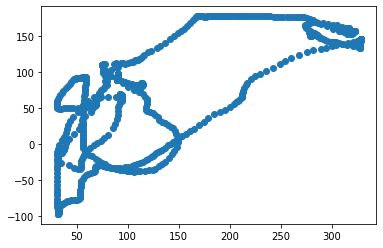

In [43]:
plt.scatter(*zip(*theta))

#### Function to implement Inverse Kinematics using Minimize function

In [44]:
l1 = 0.09;                   
l2 = 0.16;                 
w = 0.07;  
def IK_5_link(x, y, l1 = l1, l2 = l2, w = w):
    
    def leg_wide(var):
        return np.linalg.norm([var[1] - np.pi, var[0]])
    
    def x_constraint_equation(var):
        return l1**2 - l2**2 + (x - w/2)**2 + y**2 - 2*l1*(y*np.sin(var[0]) + (x - w/2)*np.cos(var[0]))

    def y_constraint_equation(var):
        return l1**2 - l2**2 + (x + w/2)**2 + y**2 - 2*l1*(y*np.sin(var[1]) + (x + w/2)*np.cos(var[1]))

    
    res = minimize(leg_wide, (0.1, 9*np.pi/10), method="SLSQP", constraints= ({"type": "eq", "fun": x_constraint_equation}, 
                                                                               {"type": "eq", "fun": y_constraint_equation}))
    
    return (res, np.linalg.norm([x_constraint_equation(res.x), y_constraint_equation(res.x)]))

#### Code to implement the GAITs provided to us. 
This function returns a list of $\theta_L$ and $\theta_R$ for a giveb gait trajctory. These are later used to make the leg move in the desired trajectory

In [45]:
def get_trajectory(x,y,d,T,N):
    
    theta_points = []
    # Stance
    z = np.polyfit([x[0],x[1]],[y[0],y[1]],1)
    p = np.poly1d(z)
    n_stance = (np.rint(N*d))
    n_stance = n_stance.astype(int)
    x_stancepoints = np.linspace(x[0],x[1],n_stance+1)
    y_stancepoints = p(x_stancepoints)
    
    # Swing
    z = np.polyfit(x,y,2)
    p = np.poly1d(z)
    n_swing = np.rint((N*(1-d)))
    n_swing = n_swing.astype(int)
    x_swingpoints = np.linspace(x[1],x[0],n_swing+1)
    y_swingpoints = p(x_swingpoints)
    
    x_points = np.append(x_stancepoints,x_swingpoints[1:])
    y_points = np.append(y_stancepoints,y_swingpoints[1:])
    
    t_points = np.linspace(0,T,N+1)
    
    for i in range(x_points.shape[0]):
        
        res = IK_5_link(x_points[i],y_points[i])
        theta_points.append([res[0].x[1],res[0].x[0]])
    
    return theta_points,t_points

In [46]:
x = np.array([0.11,-0.11,0])
y = np.array([0.12+0.05,0.12+0.05,0.05+0.05])

data1, t1_points = get_trajectory(x,y,0.5,0.25,100)

x = np.array([0.11-0.05,-0.08-0.05,0.05-0.05])
y = np.array([0.14+0.05,0.1+0.05,0.05+0.05])

data2, t2_points = get_trajectory(x,y,0.75,0.5,100)

x = np.array([0.08,-0.08,0])
y = np.array([0.1+0.05,0.1+0.05,0.04+0.05])

data3, t3_points = get_trajectory(x,y,0.5,1.5,200)

#### Store the $\theta_L$ and $\theta_R$ to a numpy file to plot the data

In [ ]:
np.save('theta_values_Data_2',data1)
np.save('theta_data3',data2)
np.save('theta_data4',data3)

#### Code to implement the parabolic gait trajectories (using angle evaluted from IK module above) and store the real motor angles to plot later
This code is ran 3 times for each $\theta_L$ and $\theta_R$ pertaining to each case i.e. 1,2 and 3.

In [50]:
cal_para_JJ=autohome(SS_odrv0)

Bring motors to home and press ENTER


<enter> 


Bring motors to 90-90 and press ENTER


<enter> 


-0.04201680672268908
-0.04429133858267716
6367.75 8509.75 594.9998779296875 -1437.0001220703125
Done


In [51]:
SS_odrv0.axis0.requested_state = odrive.enums.AXIS_STATE_CLOSED_LOOP_CONTROL
SS_odrv0.axis1.requested_state = odrive.enums.AXIS_STATE_CLOSED_LOOP_CONTROL

SS_odrv0.axis0.controller.set_pos_setpoint(0,0,0)
SS_odrv0.axis1.controller.set_pos_setpoint(0,0,0)

In [39]:
odrv0=SS_odrv0
theta_Gait=[]
odrv0.axis0.requested_state = odrive.enums.AXIS_STATE_CLOSED_LOOP_CONTROL
odrv0.axis1.requested_state = odrive.enums.AXIS_STATE_CLOSED_LOOP_CONTROL
a=np.load('data3_new3.npy')
start_time = time.time()
# your code
cpr= 2048
t_step = 0.005
w_r = 0
w_l = 0
for k in range(0,10):
    for i in range(0,len(a)):
        start_time2 = time.time()
        L_pos=(np.rad2deg(a[i][1] )/cal_para_JJ[0])+cal_para_JJ[2]
        R_pos=((np.rad2deg(a[i][0] )-180)/cal_para_JJ[1])+cal_para_JJ[3]
        if (i-1)>0:
            w_r = ((a[i][0] - a[i-1][0])/(t_step*2*np.pi) )*cpr
            w_l = ((a[i][1] - a[i-1][1])/(t_step*2*np.pi) )*cpr
        JJ_odrv0.axis0.controller.set_pos_setpoint(R_pos,1*w_r,0)
        JJ_odrv0.axis1.controller.set_pos_setpoint(L_pos,1*w_l,0)
        while (time.time() - start_time2 < 0.2*t_step):
            pass
            #clear_output()
#         time.sleep(0.1)
        theta_R=(np.around(JJ_odrv0.axis0.encoder.pos_estimate)-cal_para_JJ[3])*(cal_para_JJ[1])+180
        theta_L=((np.around(JJ_odrv0.axis1.encoder.pos_estimate)-cal_para_JJ[2])*cal_para_JJ[0])
        theta_Gait.append([theta_R,theta_L])
# motor_idle()    
elapsed_time = time.time() - start_time
print(elapsed_time)

8.107715845108032
